In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data_edited = pd.read_excel('stb4849_080321edited.xlsx')

In [ ]:
def getdata1(file):
  data = pd.read_csv(file, header=None, delimiter=r"\s+") # separate by one or more whitespaces
  data = data.iloc[:,[0,2,8,9,10,11,12,13,14,15]]
  column_names = ['Scan', 'Temperature', 'Corrected Chlorophyll', 'Turbidity (SCUFA)', 'Sigma Theta Density', 'Depth', 'Decent Rate', 'O2 SB 43 mg/L', 'O2 % Saturation', 'Salinity']
  data.columns = column_names


  # adding cast numbers and station IDs to the data frame
  data["Cast Number"] = 0
  data["Station"] = 0
  for i in range(data.shape[0]):
    if data["Scan"][i] >= 269730 and data["Scan"][i] <= 270088:
      data.loc[i, "Cast Number"] = 1
      data.loc[i, "Station"] = "SR01"
    if data["Scan"][i] >= 270089 and data["Scan"][i] <= 270586:
      data.loc[i, "Cast Number"] = 2
      data.loc[i, "Station"] = "SR02"
    if data["Scan"][i] >= 270587 and data["Scan"][i] <= 271174:
      data.loc[i, "Cast Number"] = 3
      data.loc[i, "Station"] = "SR03"
    if data["Scan"][i] >= 271175 and data["Scan"][i] <= 271777:
      data.loc[i, "Cast Number"] = 4
      data.loc[i, "Station"] = "PRN08"
    if data["Scan"][i] >= 271778 and data["Scan"][i] <= 272343:
      data.loc[i, "Cast Number"] = 5
      data.loc[i, "Station"] = "PRN07"
    if data["Scan"][i] >= 272344 and data["Scan"][i] <= 273258:
      data.loc[i, "Cast Number"] = 6
      data.loc[i, "Station"] = "PN03B"
    if data["Scan"][i] >= 273259 and data["Scan"][i] <= 273918:
      data.loc[i, "Cast Number"] = 7
      data.loc[i, "Station"] = "PRN01"
    if data["Scan"][i] >= 273919 and data["Scan"][i] <= 274246:
      data.loc[i, "Cast Number"] = 8
      data.loc[i, "Station"] = "PRT01"
    if data["Scan"][i] >= 274247 and data["Scan"][i] <= 274983:
      data.loc[i, "Cast Number"] = 9
      data.loc[i, "Station"] = "PRC05B"
    if data["Scan"][i] >= 274984 and data["Scan"][i] <= 275325:
      data.loc[i, "Cast Number"] = 10
      data.loc[i, "Station"] = "PRT02"
    if data["Scan"][i] >= 275326 and data["Scan"][i] <= 275636:
      data.loc[i, "Cast Number"] = 11
      data.loc[i, "Station"] = "PRT03"
    if data["Scan"][i] >= 275637 and data["Scan"][i] <= 275973:
      data.loc[i, "Cast Number"] = 12
      data.loc[i, "Station"] = "PRT04"
    if data["Scan"][i] >= 275974 and data["Scan"][i] <= 276492:
      data.loc[i, "Cast Number"] = 13
      data.loc[i, "Station"] = "PRC07"
    if data["Scan"][i] >= 276493 and data["Scan"][i] <= 276874:
      data.loc[i, "Cast Number"] = 14
      data.loc[i, "Station"] = "PRC08B"
    if data["Scan"][i] >= 276875 and data["Scan"][i] <= 277646:
      data.loc[i, "Cast Number"] = 15
      data.loc[i, "Station"] = "PR802"
    if data["Scan"][i] >= 277647 and data["Scan"][i] <= 278338:
      data.loc[i, "Cast Number"] = 16
      data.loc[i, "Station"] = "PR507"
    if data["Scan"][i] >= 278339 and data["Scan"][i] <= 278884:
      data.loc[i, "Cast Number"] = 17
      data.loc[i, "Station"] = "PR504"
    if data["Scan"][i] >= 278885 and data["Scan"][i] <= 279288:
      data.loc[i, "Cast Number"] = 18
      data.loc[i, "Station"] = "BRT01"
    if data["Scan"][i] >= 279289 and data["Scan"][i] <= 279973:
      data.loc[i, "Cast Number"] = 19
      data.loc[i, "Station"] = "BRT02"
    if data["Scan"][i] >= 279974 and data["Scan"][i] <= 280545:
      data.loc[i, "Cast Number"] = 20
      data.loc[i, "Station"] = "BRT03"
    if data["Scan"][i] >= 280546 and data["Scan"][i] <= 280962:
      data.loc[i, "Cast Number"] = 21
      data.loc[i, "Station"] = "BRT04"
    if data["Scan"][i] >= 280963 and data["Scan"][i] <= 281358:
      data.loc[i, "Cast Number"] = 22
      data.loc[i, "Station"] = "BRT0C"
    if data["Scan"][i] >= 281359 and data["Scan"][i] <= 282090:
      data.loc[i, "Cast Number"] = 23
      data.loc[i, "Station"] = "PR503"
    if data["Scan"][i] >= 282091 and data["Scan"][i] <= 282758:
      data.loc[i, "Cast Number"] = 24
      data.loc[i, "Station"] = "4PB10"
    if data["Scan"][i] >= 282759 and data["Scan"][i] <= 283417:
      data.loc[i, "Cast Number"] = 25
      data.loc[i, "Station"] = "4PB11"
    if data["Scan"][i] >= 283418 and data["Scan"][i] <= 283820:
      data.loc[i, "Cast Number"] = 26
      data.loc[i, "Station"] = "BBT2"
    if data["Scan"][i] >= 283821 and data["Scan"][i] <= 284394:
      data.loc[i, "Cast Number"] = 27
      data.loc[i, "Station"] = "BBT3"
  

  data_update = data[0:0]

  for i in range(max(data['Cast Number'])):
    cast_number = data[data['Cast Number'] == i+1]
    scan = cast_number['Scan']    # x
    depth = cast_number['Depth']  # y

    y_d = np.diff(depth) / np.diff(scan)

    negative_indexes = np.where(y_d < 0)[0]
    subtract = negative_indexes[1:] - negative_indexes[:-1]
    subtract = subtract - 1 
    start = negative_indexes[np.argmax(subtract)] + 1   # can possibly add -2 here to increase accuracy for cast 25
    end = negative_indexes[np.argmax(subtract) + 1]     # can possibly add +2 here to increase accuracy for cast 25

    new_data = cast_number[start:end]
    data_update = pd.concat([data_update, new_data])


  

  reorder_column_names = ['Cast Number', 'Scan', 'Station', 'Depth', 'Salinity', 'Temperature', 'Sigma Theta Density', 'O2 SB 43 mg/L', 'O2 % Saturation', 'Corrected Chlorophyll', 'Turbidity (SCUFA)', 'Decent Rate']
  data_ordered = data_update.reindex(columns=reorder_column_names)



  # reset indexes 
  data_ordered = data_ordered.reset_index(drop=True)

  return data_ordered

In [ ]:
def getdata2(file):  # without filtering out redundant observations 
  data = pd.read_csv(file, header=None, delimiter=r"\s+") # separate by one or more whitespaces
  data = data.iloc[:,[0,2,8,9,10,11,12,13,14,15]]
  column_names = ['Scan', 'Temperature', 'Corrected Chlorophyll', 'Turbidity (SCUFA)', 'Sigma Theta Density', 'Depth', 'Decent Rate', 'O2 SB 43 mg/L', 'O2 % Saturation', 'Salinity']
  data.columns = column_names


  # adding cast numbers and station IDs to the data frame
  data["Cast Number"] = 0
  data["Station"] = 0
  for i in range(data.shape[0]):
    if data["Scan"][i] >= 269730 and data["Scan"][i] <= 270088:
      data.loc[i, "Cast Number"] = 1
      data.loc[i, "Station"] = "SR01"
    if data["Scan"][i] >= 270089 and data["Scan"][i] <= 270586:
      data.loc[i, "Cast Number"] = 2
      data.loc[i, "Station"] = "SR02"
    if data["Scan"][i] >= 270587 and data["Scan"][i] <= 271174:
      data.loc[i, "Cast Number"] = 3
      data.loc[i, "Station"] = "SR03"
    if data["Scan"][i] >= 271175 and data["Scan"][i] <= 271777:
      data.loc[i, "Cast Number"] = 4
      data.loc[i, "Station"] = "PRN08"
    if data["Scan"][i] >= 271778 and data["Scan"][i] <= 272343:
      data.loc[i, "Cast Number"] = 5
      data.loc[i, "Station"] = "PRN07"
    if data["Scan"][i] >= 272344 and data["Scan"][i] <= 273258:
      data.loc[i, "Cast Number"] = 6
      data.loc[i, "Station"] = "PN03B"
    if data["Scan"][i] >= 273259 and data["Scan"][i] <= 273918:
      data.loc[i, "Cast Number"] = 7
      data.loc[i, "Station"] = "PRN01"
    if data["Scan"][i] >= 273919 and data["Scan"][i] <= 274246:
      data.loc[i, "Cast Number"] = 8
      data.loc[i, "Station"] = "PRT01"
    if data["Scan"][i] >= 274247 and data["Scan"][i] <= 274983:
      data.loc[i, "Cast Number"] = 9
      data.loc[i, "Station"] = "PRC05B"
    if data["Scan"][i] >= 274984 and data["Scan"][i] <= 275325:
      data.loc[i, "Cast Number"] = 10
      data.loc[i, "Station"] = "PRT02"
    if data["Scan"][i] >= 275326 and data["Scan"][i] <= 275636:
      data.loc[i, "Cast Number"] = 11
      data.loc[i, "Station"] = "PRT03"
    if data["Scan"][i] >= 275637 and data["Scan"][i] <= 275973:
      data.loc[i, "Cast Number"] = 12
      data.loc[i, "Station"] = "PRT04"
    if data["Scan"][i] >= 275974 and data["Scan"][i] <= 276492:
      data.loc[i, "Cast Number"] = 13
      data.loc[i, "Station"] = "PRC07"
    if data["Scan"][i] >= 276493 and data["Scan"][i] <= 276874:
      data.loc[i, "Cast Number"] = 14
      data.loc[i, "Station"] = "PRC08B"
    if data["Scan"][i] >= 276875 and data["Scan"][i] <= 277646:
      data.loc[i, "Cast Number"] = 15
      data.loc[i, "Station"] = "PR802"
    if data["Scan"][i] >= 277647 and data["Scan"][i] <= 278338:
      data.loc[i, "Cast Number"] = 16
      data.loc[i, "Station"] = "PR507"
    if data["Scan"][i] >= 278339 and data["Scan"][i] <= 278884:
      data.loc[i, "Cast Number"] = 17
      data.loc[i, "Station"] = "PR504"
    if data["Scan"][i] >= 278885 and data["Scan"][i] <= 279288:
      data.loc[i, "Cast Number"] = 18
      data.loc[i, "Station"] = "BRT01"
    if data["Scan"][i] >= 279289 and data["Scan"][i] <= 279973:
      data.loc[i, "Cast Number"] = 19
      data.loc[i, "Station"] = "BRT02"
    if data["Scan"][i] >= 279974 and data["Scan"][i] <= 280545:
      data.loc[i, "Cast Number"] = 20
      data.loc[i, "Station"] = "BRT03"
    if data["Scan"][i] >= 280546 and data["Scan"][i] <= 280962:
      data.loc[i, "Cast Number"] = 21
      data.loc[i, "Station"] = "BRT04"
    if data["Scan"][i] >= 280963 and data["Scan"][i] <= 281358:
      data.loc[i, "Cast Number"] = 22
      data.loc[i, "Station"] = "BRT0C"
    if data["Scan"][i] >= 281359 and data["Scan"][i] <= 282090:
      data.loc[i, "Cast Number"] = 23
      data.loc[i, "Station"] = "PR503"
    if data["Scan"][i] >= 282091 and data["Scan"][i] <= 282758:
      data.loc[i, "Cast Number"] = 24
      data.loc[i, "Station"] = "4PB10"
    if data["Scan"][i] >= 282759 and data["Scan"][i] <= 283417:
      data.loc[i, "Cast Number"] = 25
      data.loc[i, "Station"] = "4PB11"
    if data["Scan"][i] >= 283418 and data["Scan"][i] <= 283820:
      data.loc[i, "Cast Number"] = 26
      data.loc[i, "Station"] = "BBT2"
    if data["Scan"][i] >= 283821 and data["Scan"][i] <= 284394:
      data.loc[i, "Cast Number"] = 27
      data.loc[i, "Station"] = "BBT3"
  

  reorder_column_names = ['Cast Number', 'Scan', 'Station', 'Depth', 'Salinity', 'Temperature', 'Sigma Theta Density', 'O2 SB 43 mg/L', 'O2 % Saturation', 'Corrected Chlorophyll', 'Turbidity (SCUFA)', 'Decent Rate']
  data_ordered = data.reindex(columns=reorder_column_names)


  # delete rows before 269730
  index = data_ordered.index[data_ordered["Scan"] == 269730].tolist()[0]
  data_ordered = data_ordered.iloc[index:,:]
  

  # reset indexes 
  data_ordered = data_ordered.reset_index(drop=True)

  return data_ordered

In [ ]:
a = getdata1('stb4849_080321.txt') # preprocessed the raw dataset and filtered out noisy observations 
b = getdata2('stb4849_080321.txt') # preprocessed the raw dataset without filtering out noisy observations 

In [31]:
a.to_csv("preprocessed_dataset.csv")

In [ ]:
a['Cast Number'].value_counts().sort_index()
# cast 25 and 27 

1      89
2     142
3     233
4     232
5     209
6     378
7     272
8      57
9     335
10     50
11     37
12     33
13    157
14     69
15    386
16    318
17     63
18    109
19    325
20    202
21    136
22     49
23    272
24    325
25    176
26    115
27     47
Name: Cast Number, dtype: int64

In [ ]:
data_edited['Cast Number'].value_counts().sort_index()

1      89
2     143
3     232
4     231
5     210
6     371
7     272
8      58
9     334
10     51
11     38
12     33
13    157
14     70
15    386
16    317
17     64
18    108
19    319
20    200
21    224
23    268
24    322
25    293
26    116
27    205
Name: Cast Number, dtype: int64

In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')

def graph_depth(file):
  for i in range(len(file['Cast Number'].value_counts())):
    fig, ax = plt.subplots(figsize=(5,5))
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')

    plt.xlabel("Scan")
    plt.ylabel("Depth")
    plt.gca().invert_yaxis()
    plt.title(f"Depth plot for cast {i+1}")
    plt.ticklabel_format(useOffset=False)

    scan = file[file['Cast Number'] == i+1]['Scan']
    depth = file[file['Cast Number'] == i+1]['Depth']
    ax.plot(scan, depth)

    plt.savefig(f"Cast {i+1}.png")
    plt.show()
    print()

# depth plots for cast 21 and 22 are weird 

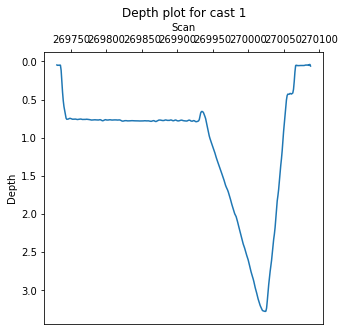

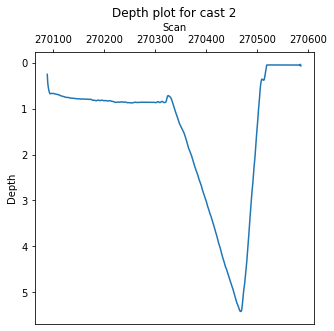

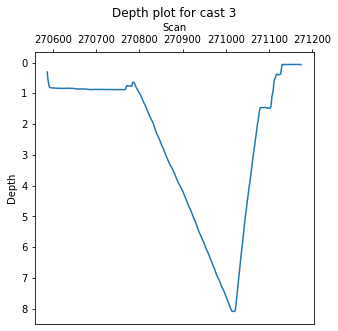

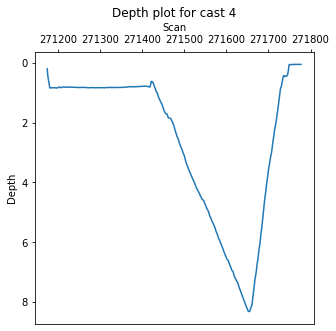

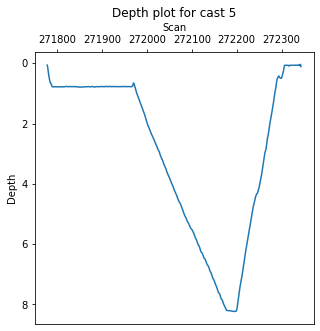

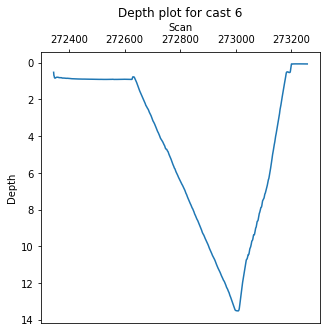

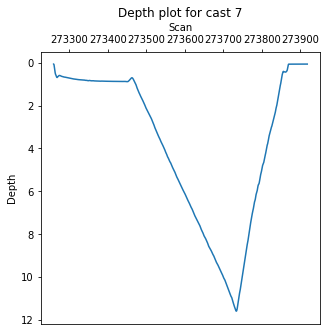

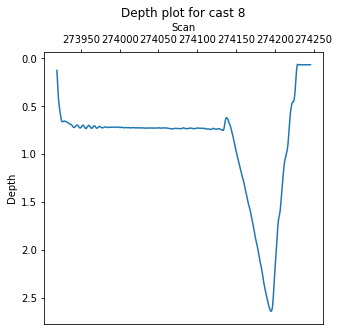

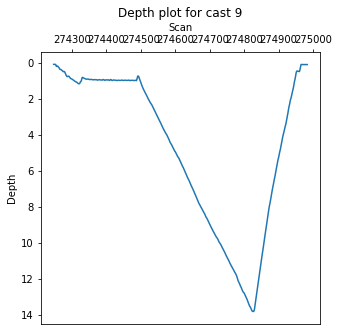

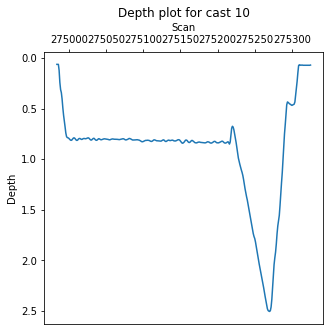

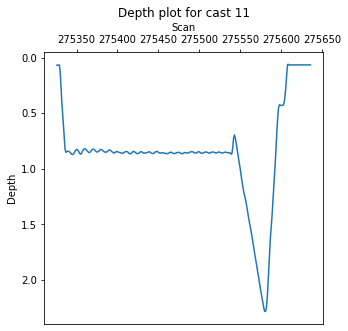

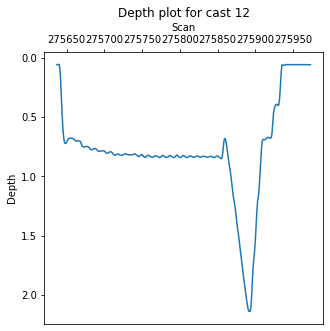

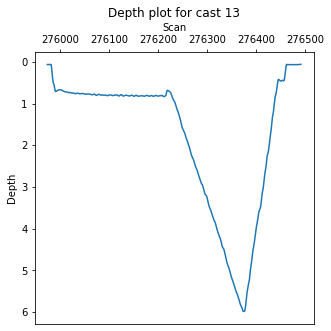

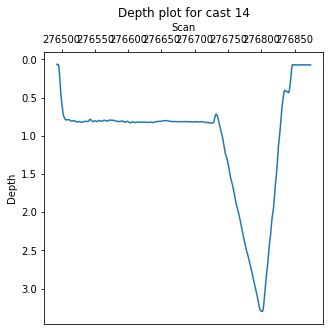

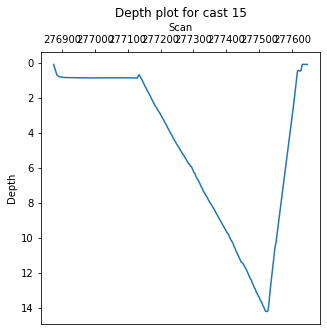

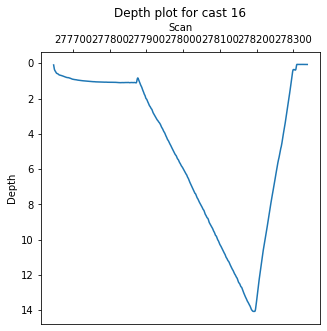

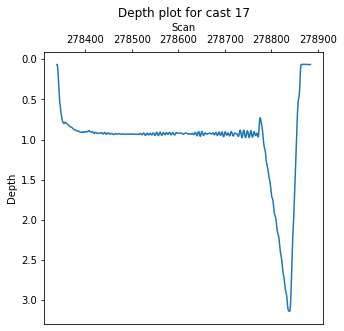

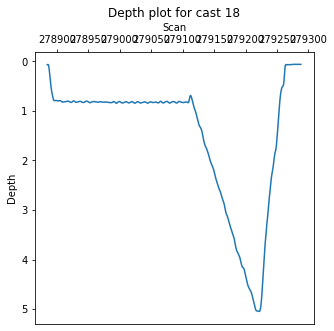

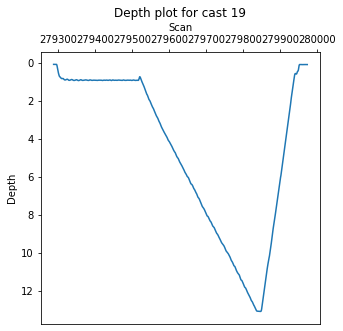

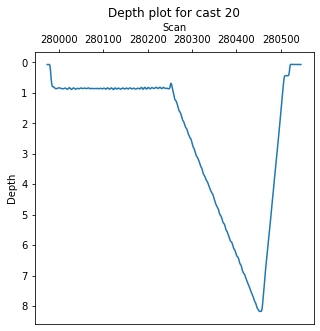

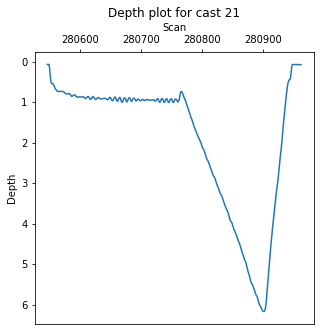

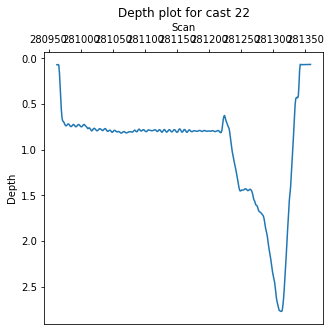

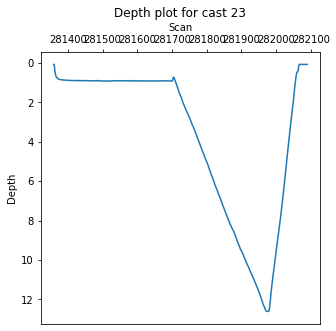

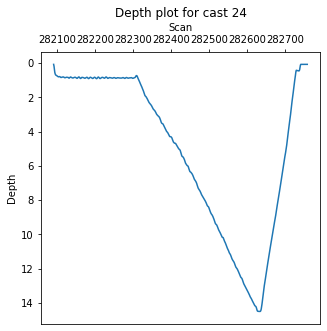

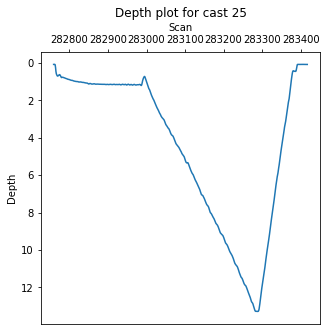

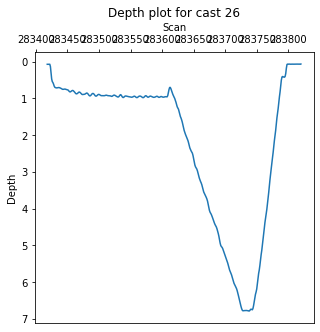

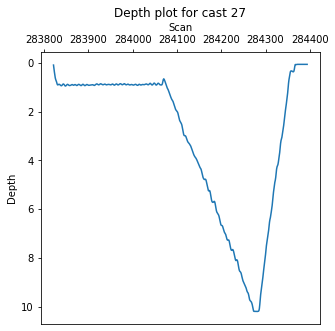

In [ ]:
graph_depth(b)

In [ ]:
! zip results2.zip *.png

  adding: Cast 10.png (deflated 5%)
  adding: Cast 11.png (deflated 5%)
  adding: Cast 12.png (deflated 5%)
  adding: Cast 13.png (deflated 5%)
  adding: Cast 14.png (deflated 6%)
  adding: Cast 15.png (deflated 5%)
  adding: Cast 16.png (deflated 6%)
  adding: Cast 17.png (deflated 5%)
  adding: Cast 18.png (deflated 6%)
  adding: Cast 19.png (deflated 5%)
  adding: Cast 1.png (deflated 6%)
  adding: Cast 20.png (deflated 5%)
  adding: Cast 21.png (deflated 6%)
  adding: Cast 22.png (deflated 6%)
  adding: Cast 23.png (deflated 6%)
  adding: Cast 24.png (deflated 5%)
  adding: Cast 25.png (deflated 6%)
  adding: Cast 26.png (deflated 5%)
  adding: Cast 27.png (deflated 5%)
  adding: Cast 2.png (deflated 6%)
  adding: Cast 3.png (deflated 5%)
  adding: Cast 4.png (deflated 5%)
  adding: Cast 5.png (deflated 5%)
  adding: Cast 6.png (deflated 5%)
  adding: Cast 7.png (deflated 5%)
  adding: Cast 8.png (deflated 6%)
  adding: Cast 9.png (deflated 6%)


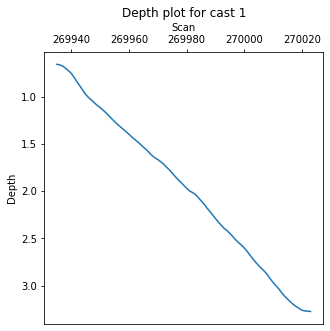

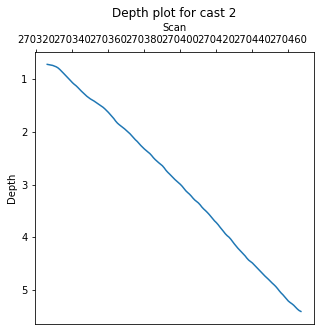

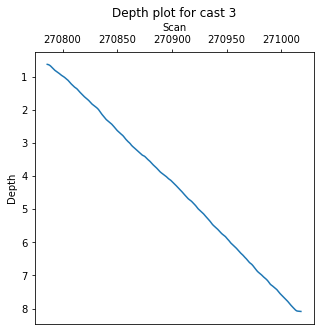

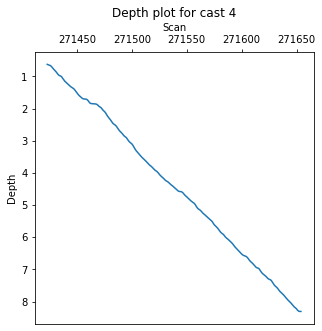

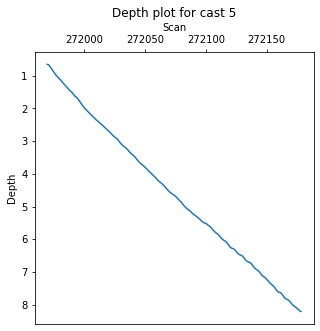

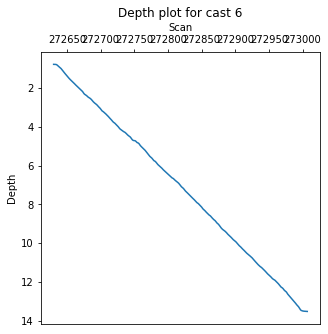

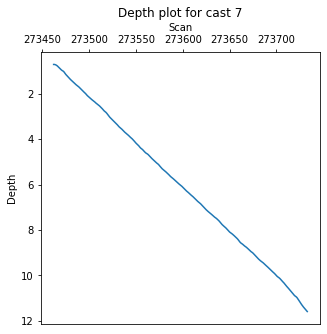

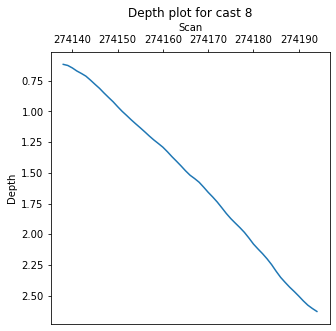

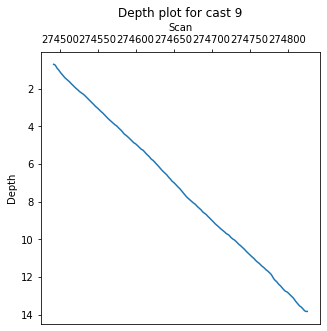

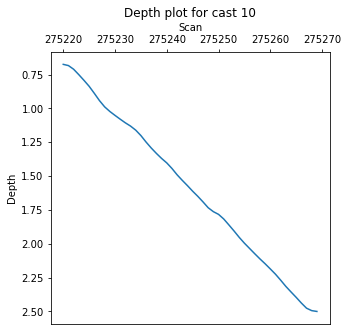

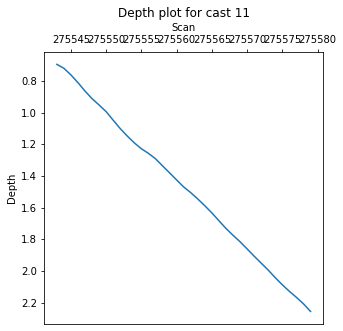

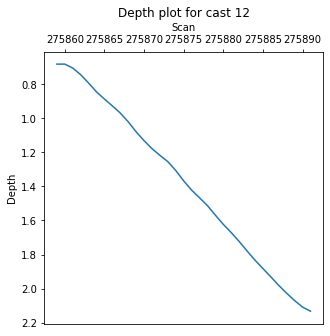

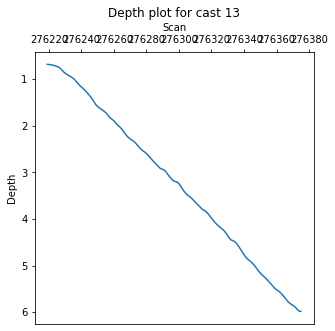

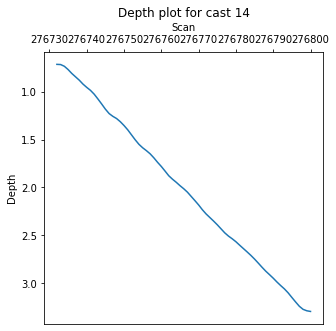

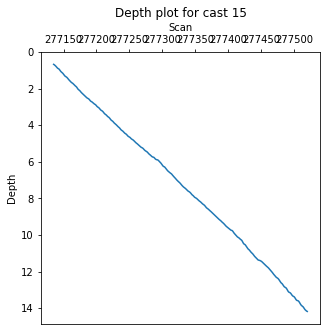

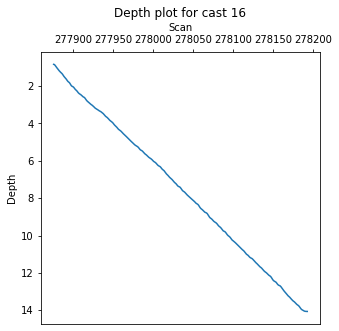

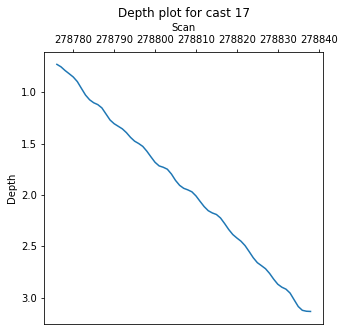

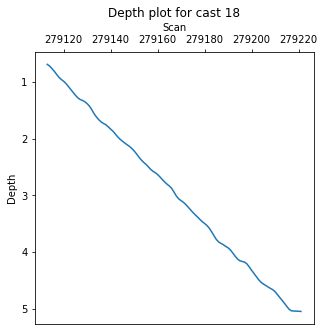

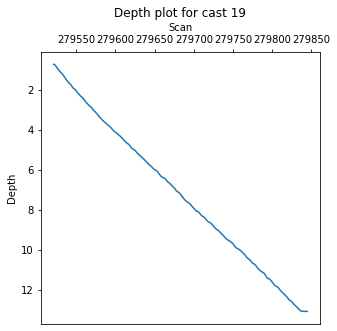

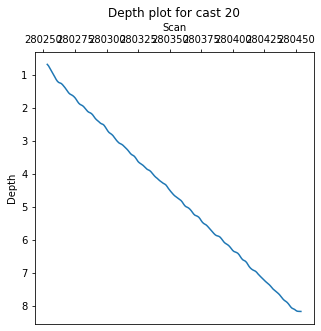

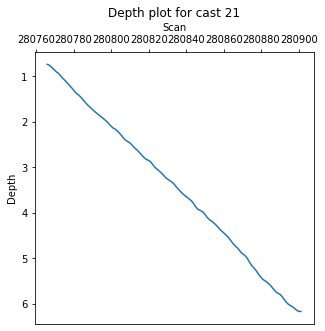

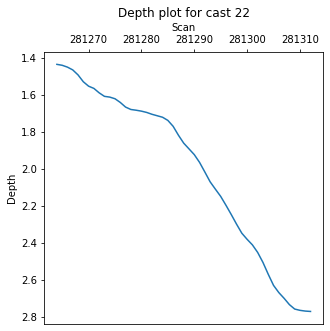

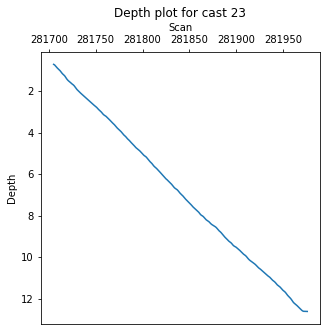

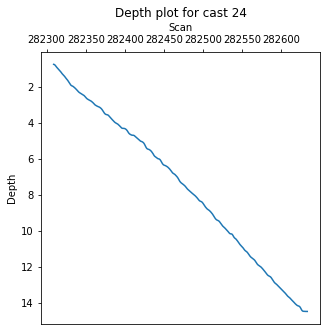

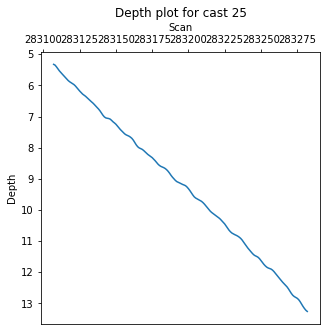

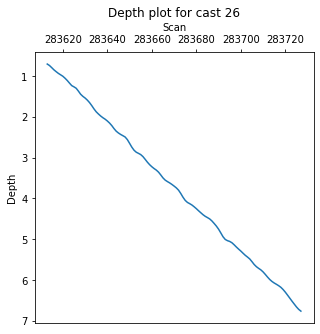

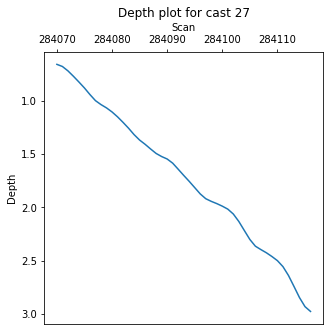

In [ ]:
graph_depth(a)

In [ ]:
! zip results3.zip *.png

  adding: Cast 10.png (deflated 7%)
  adding: Cast 11.png (deflated 6%)
  adding: Cast 12.png (deflated 6%)
  adding: Cast 13.png (deflated 6%)
  adding: Cast 14.png (deflated 6%)
  adding: Cast 15.png (deflated 6%)
  adding: Cast 16.png (deflated 7%)
  adding: Cast 17.png (deflated 6%)
  adding: Cast 18.png (deflated 6%)
  adding: Cast 19.png (deflated 6%)
  adding: Cast 1.png (deflated 6%)
  adding: Cast 20.png (deflated 6%)
  adding: Cast 21.png (deflated 6%)
  adding: Cast 22.png (deflated 6%)
  adding: Cast 23.png (deflated 6%)
  adding: Cast 24.png (deflated 6%)
  adding: Cast 25.png (deflated 6%)
  adding: Cast 26.png (deflated 6%)
  adding: Cast 27.png (deflated 6%)
  adding: Cast 2.png (deflated 6%)
  adding: Cast 3.png (deflated 6%)
  adding: Cast 4.png (deflated 6%)
  adding: Cast 5.png (deflated 6%)
  adding: Cast 6.png (deflated 6%)
  adding: Cast 7.png (deflated 6%)
  adding: Cast 8.png (deflated 6%)
  adding: Cast 9.png (deflated 6%)


In [ ]:
def graphall(file):
  for i in range(4, len(file.columns)):
    fig, ax = plt.subplots(figsize=(10,10))
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')

    plt.xlabel(f"{file.columns[i]}")
    plt.ylabel("Depth")
    plt.gca().invert_yaxis()
    plt.title(f"{file.columns[i]} plot for each cast")
    plt.ticklabel_format(useOffset=False)

    legend_list = []
    for j in range(len((file['Cast Number'].value_counts()))+1):
      var = file[file['Cast Number'] == j+1][file.columns[i]]
      depth = file[file['Cast Number'] == j+1]['Depth']
      ax.plot(var, depth)
      legend_list.append(f'Cast {j+1}')
  
    plt.legend(legend_list, ncol=5, bbox_to_anchor=(0.75, -0.03))

    plt.savefig(f"{i}.png")
    print(f"{file.columns[i]} vs. Depth Plot for Each Cast")
    plt.show()
    print()

Salinity vs. Depth Plot for Each Cast


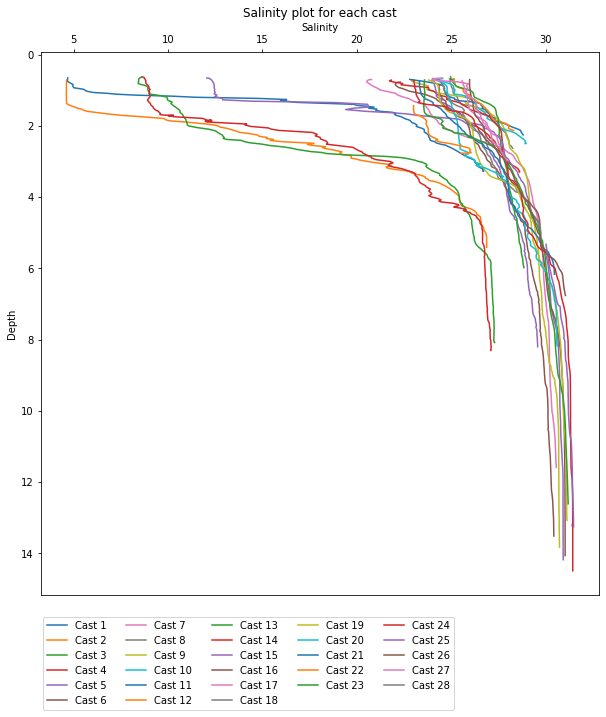


Temperature vs. Depth Plot for Each Cast


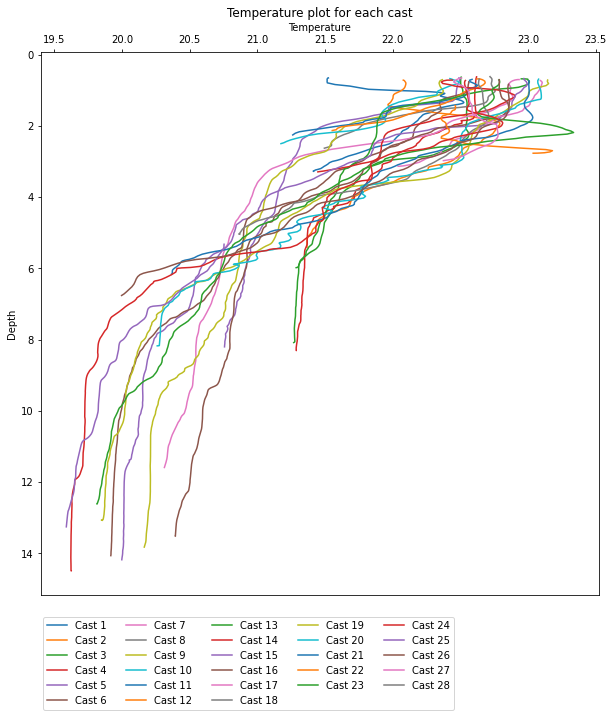


Sigma Theta Density vs. Depth Plot for Each Cast


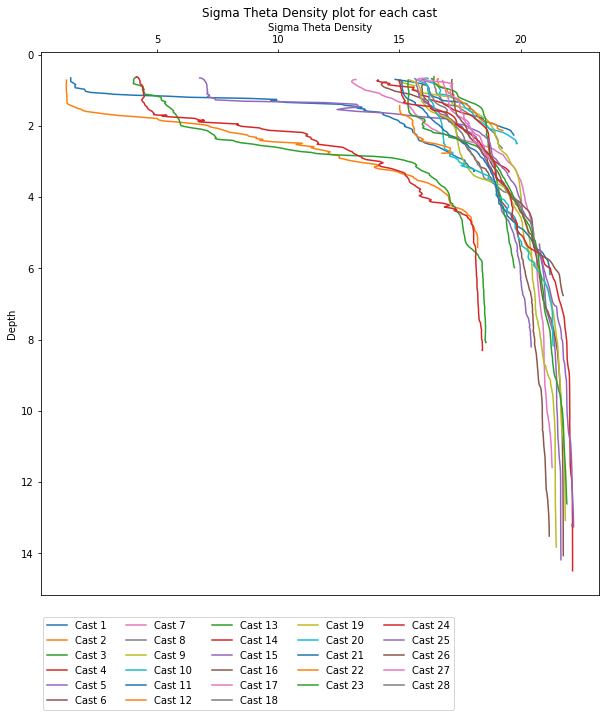


O2 SB 43 mg/L vs. Depth Plot for Each Cast


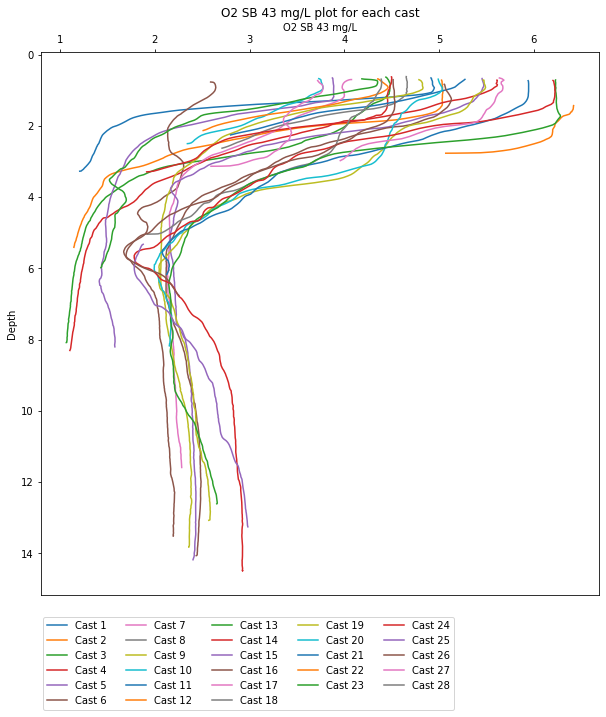


O2 % Saturation vs. Depth Plot for Each Cast


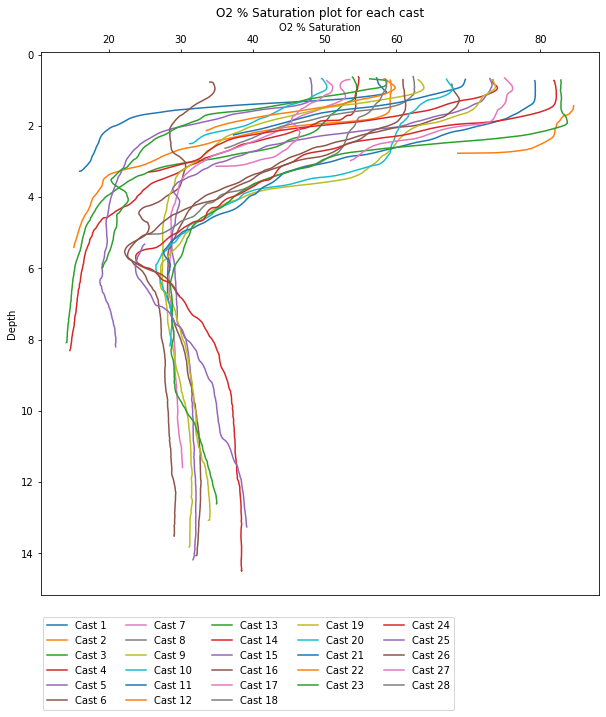


Corrected Chlorophyll vs. Depth Plot for Each Cast


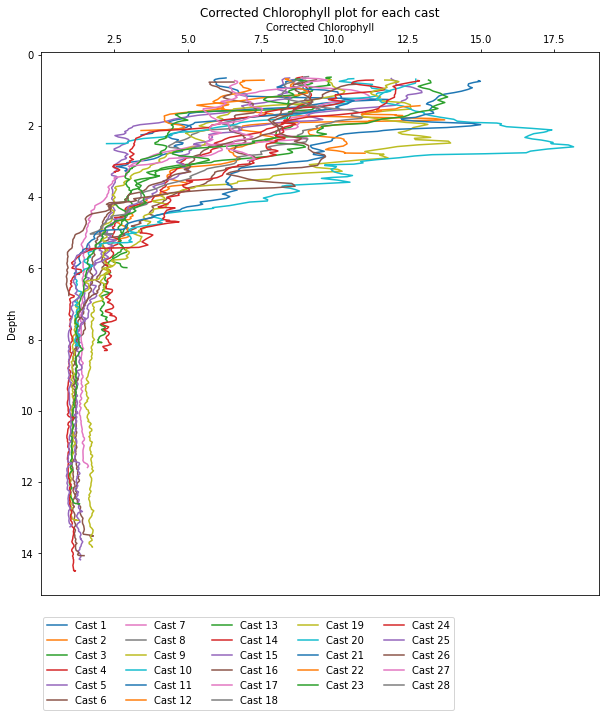


Turbidity (SCUFA) vs. Depth Plot for Each Cast


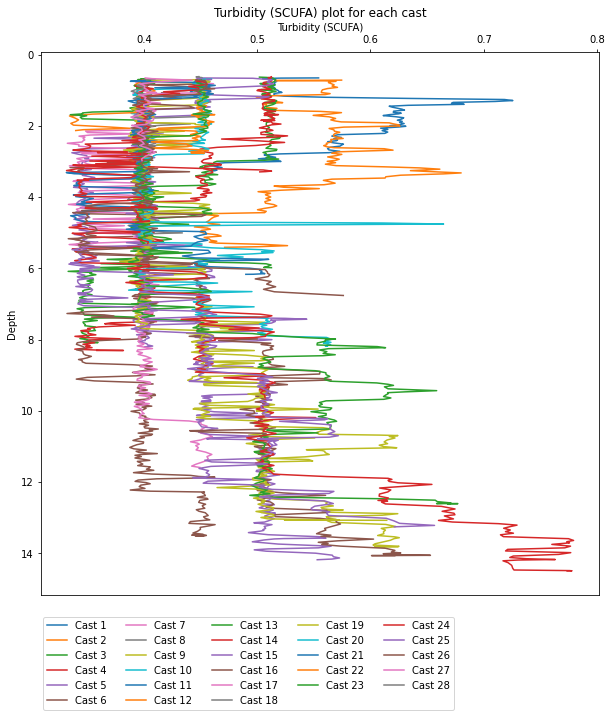


Decent Rate vs. Depth Plot for Each Cast


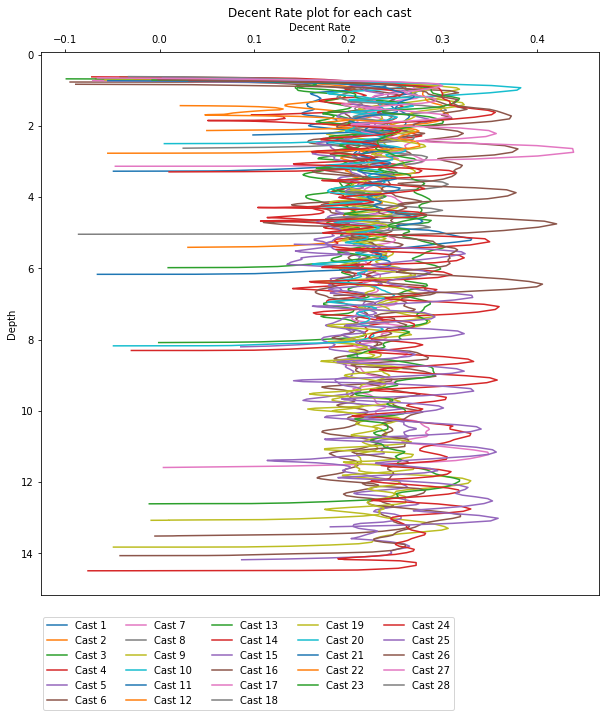

In [ ]:
images = graphall(a)

In [ ]:
! zip results1.zip *.png

  adding: 10.png (deflated 2%)
  adding: 11.png (deflated 2%)
  adding: 4.png (deflated 5%)
  adding: 5.png (deflated 3%)
  adding: 6.png (deflated 4%)
  adding: 7.png (deflated 3%)
  adding: 8.png (deflated 3%)
  adding: 9.png (deflated 3%)
  adding: Cast 10.png (deflated 5%)
  adding: Cast 11.png (deflated 5%)
  adding: Cast 12.png (deflated 5%)
  adding: Cast 13.png (deflated 5%)
  adding: Cast 14.png (deflated 6%)
  adding: Cast 15.png (deflated 5%)
  adding: Cast 16.png (deflated 6%)
  adding: Cast 17.png (deflated 5%)
  adding: Cast 18.png (deflated 6%)
  adding: Cast 19.png (deflated 5%)
  adding: Cast 1.png (deflated 6%)
  adding: Cast 20.png (deflated 5%)
  adding: Cast 21.png (deflated 6%)
  adding: Cast 22.png (deflated 6%)
  adding: Cast 23.png (deflated 6%)
  adding: Cast 24.png (deflated 5%)
  adding: Cast 25.png (deflated 6%)
  adding: Cast 26.png (deflated 5%)
  adding: Cast 27.png (deflated 5%)
  adding: Cast 2.png (deflated 6%)
  adding: Cast 3.png (deflated 5%)
  add

In [ ]:
def summary_statistics(file):
  new_file = file.copy()
  depth = new_file['Depth']
  for i in range(len(depth)):
    depth[i] = round(depth[i]*2)/2
    new_file.loc[i, 'Depth'] = depth[i]
  
  values = new_file['Depth'].value_counts().index.tolist()
  values_station = new_file['Station'].value_counts().index.tolist()


  
  new_data = new_file[0:0]


  for j in range(len(values_station)):
    subset_file = new_file.loc[(new_file['Station'] == values_station[j]),]
    for l in range(len(values)):
      subset_file_station = subset_file.loc[(subset_file['Depth'] == values[l]),]


      new_entry = subset_file_station.loc[:,[c for c in subset_file_station.columns if c != "Station"]].mean(axis=0)
      new_entry = round(new_entry, 2)
  
      new_data2 = new_file[0:0]
      new_data2 = new_data2.append(new_entry, ignore_index = True)
      for z in range(len(new_data2)):
        new_data2['Station'][z] = values_station[j]
      
      new_data = pd.concat([new_data, new_data2])


  new_data = new_data.drop(['Cast Number', 'Scan'], 1)
  new_data = new_data.dropna()
  new_data = new_data.sort_values(by = ['Station', 'Depth'])
  new_data = new_data.reset_index(drop=True)

  date_list = []
  for x in range(new_data.shape[0]):
    date_list.append("8/3/2021")
  new_data['Date'] = date_list

  new_data['Time'] = 0
  for m in range(new_data.shape[0]):
    if new_data['Station'][m] == 'SR01':
      new_data['Time'][m] = "8:18"
    if new_data['Station'][m] == 'SR02':
      new_data['Time'][m] = "8:27"
    if new_data['Station'][m] == 'SR03':
      new_data['Time'][m] = "8:39"
    if new_data['Station'][m] == 'PRN08':
      new_data['Time'][m] = "8:48"
    if new_data['Station'][m] == 'PRN07':
      new_data['Time'][m] = "8:53"
    if new_data['Station'][m] == 'PN03B':
      new_data['Time'][m] = "8:59"
    if new_data['Station'][m] == 'PRN01':
      new_data['Time'][m] = "9:05"
    if new_data['Station'][m] == 'PRT01':
      new_data['Time'][m] = "9:11"
    if new_data['Station'][m] == 'PRC05B':
      new_data['Time'][m] = "9:13"
    if new_data['Station'][m] == 'PRT02':
      new_data['Time'][m] = "9:18"
    if new_data['Station'][m] == 'PRT03':
      new_data['Time'][m] = "9:21"
    if new_data['Station'][m] == 'PRT04':
      new_data['Time'][m] = "9:24"
    if new_data['Station'][m] == 'PRC07':
      new_data['Time'][m] = "9:28"
    if new_data['Station'][m] == 'PRC08B':
      new_data['Time'][m] = "9:33"
    if new_data['Station'][m] == 'PR802':
      new_data['Time'][m] = "9:38"
    if new_data['Station'][m] == 'PR507':
      new_data['Time'][m] = "9:44"
    if new_data['Station'][m] == 'PR504':
      new_data['Time'][m] = "9:51"
    if new_data['Station'][m] == 'BRT01':
      new_data['Time'][m] = "9:56"
    if new_data['Station'][m] == 'BRT02':
      new_data['Time'][m] = "9:59"
    if new_data['Station'][m] == 'BRT03':
      new_data['Time'][m] = "10:03"
    if new_data['Station'][m] == 'BRT04':
      new_data['Time'][m] = "10:07"
    if new_data['Station'][m] == 'BRT0C':
      new_data['Time'][m] = "10:12"
    if new_data['Station'][m] == 'PR503':
      new_data['Time'][m] = "10:17"
    if new_data['Station'][m] == '4PB10':
      new_data['Time'][m] = "10:24"
    if new_data['Station'][m] == '4PB11':
      new_data['Time'][m] = "10:28"
    if new_data['Station'][m] == 'BBT2':
      new_data['Time'][m] = "10:33"
    if new_data['Station'][m] == 'BBT3':
      new_data['Time'][m] = "10:42"


  reorder_column_names = ['Date', 'Time', 'Station', 'Depth', 'Salinity', 'Temperature', 'Sigma Theta Density', 'O2 SB 43 mg/L', 'O2 % Saturation', 'Corrected Chlorophyll', 'Turbidity (SCUFA)', 'Decent Rate']
  new_data = new_data.reindex(columns=reorder_column_names)
 

  return new_data

In [ ]:
updated_a = summary_statistics(a)
updated_a

,Date,Time,Station,Depth,Salinity,Temperature,Sigma Theta Density,O2 SB 43 mg/L,O2 % Saturation,Corrected Chlorophyll,Turbidity (SCUFA),Decent Rate
0,8/3/2021,10:24,4PB10,0.5,23.02,22.54,15.00,6.20,81.91,12.87,0.45,0.07
1,8/3/2021,10:24,4PB10,1.0,23.11,22.54,15.07,6.22,82.16,12.14,0.43,0.28
2,8/3/2021,10:24,4PB10,1.5,24.38,22.58,16.02,6.10,81.16,11.41,0.40,0.33
3,8/3/2021,10:24,4PB10,2.0,26.40,22.76,17.49,5.06,68.44,8.43,0.40,0.25
4,8/3/2021,10:24,4PB10,2.5,27.33,22.33,18.31,4.02,54.22,7.97,0.38,0.20
...,...,...,...,...,...,...,...,...,...,...,...,...
397,8/3/2021,8:39,SR03,6.0,27.10,21.31,18.41,1.16,15.33,2.30,0.37,0.20
398,8/3/2021,8:39,SR03,6.5,27.16,21.29,18.46,1.13,14.95,2.20,0.35,0.21
399,8/3/2021,8:39,SR03,7.0,27.21,21.29,18.50,1.11,14.71,2.10,0.36,0.20
400,8/3/2021,8:39,SR03,7.5,27.26,21.28,18.54,1.09,14.42,2.15,0.36,0.20


In [29]:
updated_a.to_csv("Summay_Statistics_for_the_Edited_Dataset.csv")